### Import packages

In [1]:
library(cisTopic)

In [2]:
packageVersion("cisTopic")

[1] ‘0.2.1’

In [3]:
set.seed(2019)

### Load Data

In [4]:
load(file = '../../run_methods/cisTopic/cisTopic_cusanovich2018subset.RData')

### Cluster cells

Loading required package: fastcluster

Attaching package: ‘fastcluster’

The following object is masked from ‘package:stats’:

    hclust

Loading required package: ComplexHeatmap
Loading required package: grid
ComplexHeatmap version 1.18.1
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://bioconductor.org/packages/ComplexHeatmap/

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.



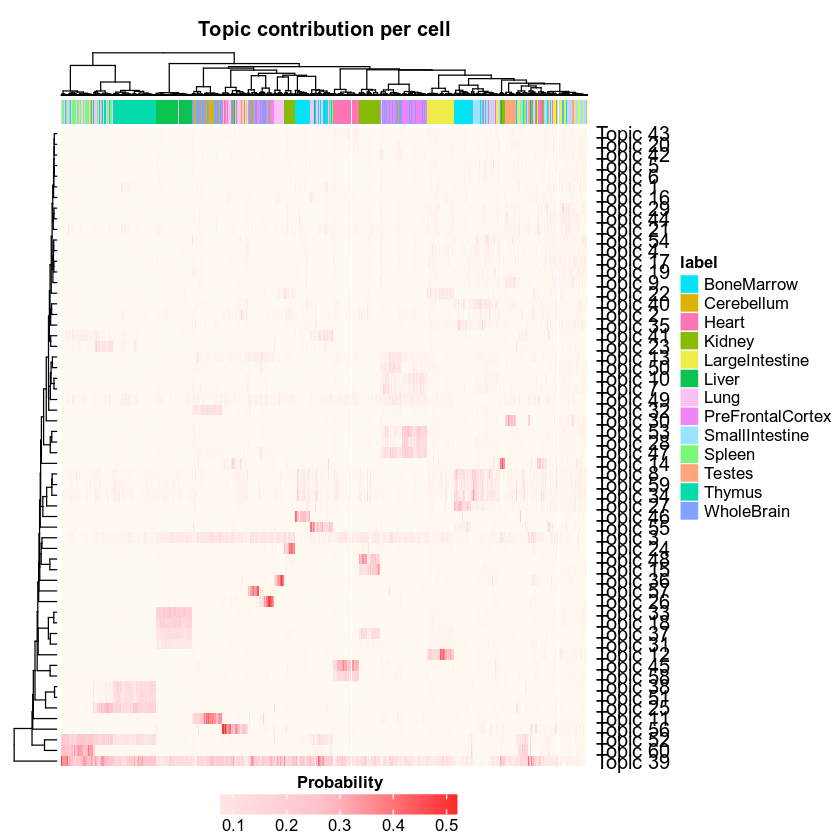

In [5]:
cellTopicHeatmap(cisTopicObject, method='Probability', colorBy=c('label'))

Drilling down into the code, we can extract the clustering (https://github.com/aertslab/cisTopic/blob/master/R/PlotCells.R)

In [6]:
topic.mat <- modelMatSelection(cisTopicObject, 'cell', 'Probability')
rownames(topic.mat) <- paste('Topic', seq(1,nrow(topic.mat)))
colnames(topic.mat) <- cisTopicObject@cell.names

In [7]:
cl.cells <- fastcluster::hclust.vector(t(topic.mat), method="ward", metric="euclidean")

In [8]:
nClusters = length(levels(as.factor(metadata$label)))
df_pre = data.frame('cisTopic'=cutree(cl.cells,nClusters))
df_pre$ord = 1:nrow(df_pre)
df_pre = df_pre[as.character(rownames(metadata)),]
df_out = data.frame('cisTopic'=df_pre[,'cisTopic'])
rownames(df_out) = rownames(df_pre)
write.table(df_out,file="clusteringSolution.tsv", quote=FALSE, sep='\t', col.names = NA)